In [2]:
from src import LangevinFunctions
from src import StatsFunctions
from src import CVE_Functions
from src import Diffusion_MLE
from src import MSDFunctions
from src import PlottingFunctions
SF_F = StatsFunctions.Statistics_Functions()
LF_F = LangevinFunctions.LF()
CVE = CVE_Functions.CVE()
MLE = Diffusion_MLE.D_MLE()
MSD = MSDFunctions.MSD()
plots = PlottingFunctions.Plotter()
import numpy as np
import matplotlib.pyplot as plt

We can quickly simulate 1,000 different actualisations of our coordinate to compare our CVE, MLE and MSD.

In [7]:
D_estimates_CVE = np.zeros(1000)
D_estimates_MLE = np.zeros(1000)
D_estimates_MSD = np.zeros(1000)

N = 100; # number of data points in our track
DT = 1 # diffusion coefficient
dT = 100e-3 # timestep
sigma0 = 0.05 # 50 nm localisation precision
s0 = 0.25 # 250 nm psf
n_d = 3 # 3-dimensional diffusion

for i in np.arange(1000):
    coordinates = LF_F.BrownianTrans_Realistic(DT=DT, N=N, deltaT=dT, n_d=n_d, tE=dT, sigma0=sigma0, s0=s0, R=1./6)
    D_estimates_CVE[i], _ = CVE.DSigma_CVE(coordinates, dT, R=1./6, n_d=n_d)
    D_estimates_MLE[i], _ = MLE.DSigma_MLE(coordinates, dT, R=1./6, n_d=n_d)
    D_estimates_MSD[i], _ = MSD.DSigma2_OLSF(coordinates, dT, R=1./6, n_d=n_d)

/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Code/Python/pyDiffusion_LeeLab/src/CVE_Functions.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.multiply(R, deltaX_sqr) + np.multiply((2*R - 1), mult))
/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Code/Python/pyDiffusion_LeeLab/src/CVE_Functions.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.multiply(R, deltaX_sqr) + np.multiply((2*R - 1), mult))


Then let's plot these in a histogram.

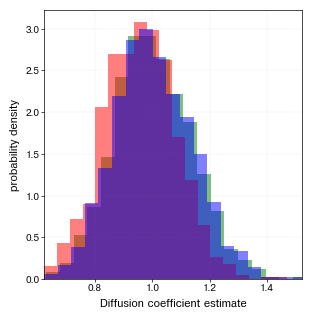

In [9]:
fig, ax = plots.one_column_plot()

ax = plots.histogram_plot(axs=ax, data=D_estimates_CVE, histcolor='green', alpha=0.5, bins=SF_F.bincalculator(D_estimates_CVE), xaxislabel='Diffusion coefficient estimate');
ax = plots.histogram_plot(axs=ax, data=D_estimates_MLE, histcolor='red', alpha=0.5, bins=SF_F.bincalculator(D_estimates_MLE), xaxislabel='Diffusion coefficient estimate');
ax = plots.histogram_plot(axs=ax, data=D_estimates_MSD, histcolor='blue', alpha=0.5, bins=SF_F.bincalculator(D_estimates_MSD), xaxislabel='Diffusion coefficient estimate');

plt.show()